In [1]:
import numpy as np

In [33]:
def utility_crra(Y: float, gamma: float) -> float:
    """
    Constant Relative Risk Aversion (CRRA) utility function.
    U(Y) = Y^(1-gamma) for gamma != 1
    U(Y) = log(Y) for gamma = 1

    Parameters:
    -----------
    Y : float
        Budget allocation (0 to 1)
    gamma : float
        Risk aversion parameter (0 = risk neutral, higher = more risk averse)

    Returns:
    --------
    float : Utility value
    """
    if gamma == 1:
        # Log utility
        return np.log(np.maximum(Y, 1e-10))  # Avoid log(0)
    else:
        return Y ** (1 - gamma)

def deriv_u(Y: float, gamma: float) -> float:
    """
    Derivative of the CRRA utility function.

    Parameters:
    -----------
    Y : float
        Budget allocation (0 to 1)
    gamma : float
        Risk aversion parameter

    Returns:
    --------
    float : Derivative of utility
    """
    if gamma == 1:
        return 1 / np.maximum(Y, 1e-10)  # Avoid division by zero
    else:
        return (1 - gamma) * Y ** (-gamma)

def utility_quad(Y: float, gamma: float) -> float:
    """
    Quadratic utility function as an alternative.

    U(Y) = Y - 0.5 * gamma * Y^2

    Parameters:
    -----------
    Y : float
        Budget allocation (0 to 1)
    gamma : float
        Risk aversion parameter

    Returns:
    --------
    float : Utility value
    """
    return Y - 0.5 * gamma * Y ** 2


def deriv_u_quad(Y: float, gamma: float) -> float:
    """
    Derivative of the quadratic utility function.

    Parameters:
    -----------
    Y : float
        Budget allocation (0 to 1)
    gamma : float
        Risk aversion parameter

    Returns:
    --------
    float : Derivative of utility
    """
    return 1 - gamma * Y

In [ ]:
gamma = .9
delta = 0.3
p = 0.5  # Probability of winning

Coop = 0.1  # Cooperation discount

V_wta = utility_quad(1,gamma) + delta * (p * utility_quad(1,gamma) + (1-p) * utility_quad(0,gamma))  # Winner-takes-all
V_coop = utility_quad(1-Coop, gamma) + delta * (
    p * utility_quad(1+Coop, gamma) + (1 - p) * utility_quad(0+Coop, gamma)
)

print("Value under winner-takes-all:", V_wta)
print("Value under cooperation:", V_coop)

# Now that we have the payoffs, we can analyze when cooperation is preferred
deltaPayoff = V_coop - V_wta
print("Delta Payoff (Cooperation - WTA):", deltaPayoff)

# now approximate the difference for small Coop
diff_approx = -deriv_u_quad(1, gamma) * Coop + delta * (
    p * deriv_u_quad(1, gamma) * Coop + (1 - p) * deriv_u_quad(0, gamma) * Coop
)
diff_approx = Coop * (-deriv_u_quad(1, gamma) + delta * (
    p * deriv_u_quad(1, gamma) + (1 - p) * deriv_u_quad(0, gamma)
))

diff_normal = -deriv_u_quad(1, gamma) + delta * (
    p * deriv_u_quad(1, gamma) + (1 - p) * deriv_u_quad(0, gamma)
)
print("Approximate Delta Payoff for small Coop:", diff_approx)

Value under winner-takes-all: 0.6325000000000001
Value under cooperation: 0.63315
Delta Payoff (Cooperation - WTA): 0.0006499999999999284
Approximate Delta Payoff for small Coop: 0.006500000000000003


Text(0.5, 0, 'Budget Allocation Y')

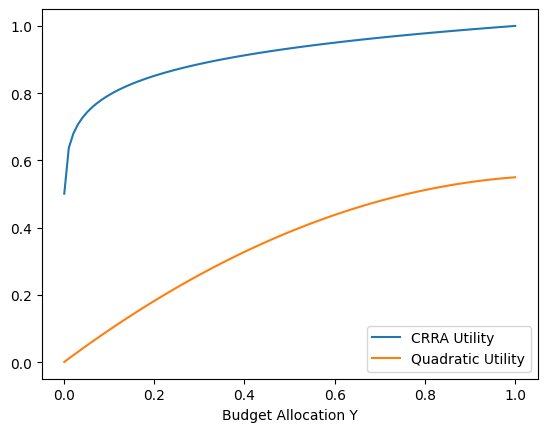

In [45]:
gamma = 0.9

Ys = np.linspace(0.001, 1, 100)
u_crra = [utility_crra(Y, gamma) for Y in Ys]
u_quad = [utility_quad(Y, gamma) for Y in Ys]

f, ax = plt.subplots()
ax.plot(Ys, u_crra, label='CRRA Utility')
ax.plot(Ys, u_quad, label='Quadratic Utility')
ax.legend()
ax.set_xlabel('Budget Allocation Y')

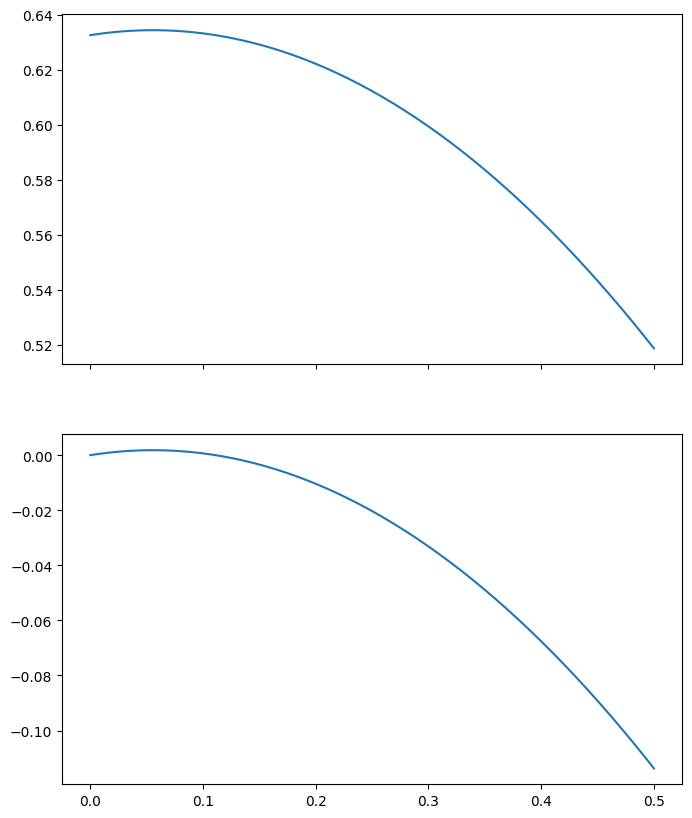

In [50]:
coops = np.linspace(0, 0.5, 200)
values_coop = []
for Coop in coops:
    V_coop = utility_quad(1-Coop, gamma) + delta * (
        p * utility_quad(1+Coop, gamma) + (1 - p) * utility_quad(0+Coop, gamma)
    )
    values_coop.append(V_coop)


diff = np.array(values_coop) - V_wta
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10), sharex=True)
ax1.plot(coops, values_coop)
ax2.plot(coops, diff)

what about the difference ?

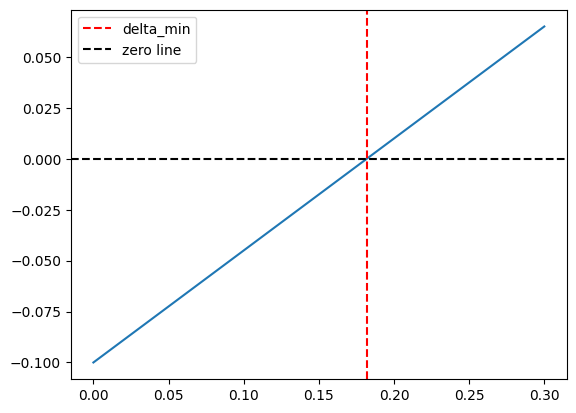

In [ ]:
deltas = np.linspace(0., 0.3, 200)

#delta_min = deriv_u_quad(1, gamma) / (
#    p * deriv_u_quad(1, gamma) + (1 - p) * deriv_u_quad(0, gamma)
#)
delta_min = (1 - gamma) / (p * (1 - gamma) + (1 - p) * deriv_u_quad(0, gamma))
# delta_min = (1 - gamma) / (1 - p - p * (1 - gamma))


diffs = -deriv_u_quad(1, gamma) + deltas * (
    p * deriv_u_quad(1, gamma) + (1 - p) * deriv_u_quad(0, gamma)
)

f, ax = plt.subplots()
ax.plot(deltas, diffs)
ax.axvline(delta_min, color='red', linestyle='--', label='delta_min')
ax.axhline(0, color="black", linestyle="--", label="zero line")
ax.legend()